In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    'D:\\客户流失\\WA_Fn-UseC_-Telco-Customer-Churn.csv',
    encoding='utf8', engine='python'
)

In [3]:
df.shape    


(7043, 21)

In [4]:
df.head()   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 缺失值，异常值处理

In [5]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
df.dtypes   

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
filter = df.TotalCharges.str.match('^[0-9]')

In [8]:
df[~filter]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
temp_df = df.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754 ])

In [10]:
temp_df['TotalCharges'] = temp_df['TotalCharges'].astype('float64')

In [11]:
temp_df['TotalCharges'].median()

1397.475

In [12]:
df['TotalCharges'][ df['TotalCharges'] == ' ' ] = 1397.475

C:\Users\Van\AppData\Local\Temp\ipykernel_21148\3564873960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][ df['TotalCharges'] == ' ' ] = 1397.475


In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [14]:
df = df.drop(['customerID'], axis=1)

In [15]:
df['target'] = np.where(df['Churn']=='Yes', 1, 0)

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [17]:
df=df.drop(['Churn'],axis=1)

In [18]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [19]:
def out_cap(x):
    x = x.clip(lower = x.quantile(0.1),upper = x.quantile(0.9))
    return x

In [20]:
y = df[['target']]
x = df.drop(['target'], axis=1)

### 将特征划分为数值型与字符串型

In [21]:
num = x.select_dtypes(include = 'number')

In [22]:
char = x.select_dtypes(include = 'object')

In [23]:
num = num.apply(lambda x: out_cap(x))

In [24]:
x = pd.concat([num,char],axis=1,join='inner')

In [25]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,2.0,29.85,84.61
1,0,34.0,56.95,1889.50
2,0,2.0,53.85,108.15
3,0,45.0,42.30,1840.75
4,0,2.0,70.70,151.65
...,...,...,...,...
7038,0,24.0,84.80,1990.50
7039,0,69.0,102.60,5973.69
7040,0,11.0,29.60,346.45
7041,1,4.0,74.40,306.60


 ### 非数值类型数据处理——独热编码

In [26]:
oneHotColumns = list(char)
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder(drop='first')
oneHotEncoder.fit(
    char[oneHotColumns]
)


OneHotEncoder(drop='first')

In [27]:
oneHotData = oneHotEncoder.transform(char[oneHotColumns])

In [28]:
from scipy.sparse import hstack

x1 = hstack([
    oneHotData, 
    num.SeniorCitizen.values.reshape(-1, 1), 
    num.tenure.values.reshape(-1, 1), 
    num.MonthlyCharges.values.reshape(-1, 1), 
    num.TotalCharges.values.reshape(-1, 1), 
])

In [29]:
x1

<7043x30 sparse matrix of type '<class 'numpy.float64'>'
	with 82321 stored elements in COOrdinate format>

In [30]:
y=y['target']

# 随即森林模型

In [31]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test=train_test_split(x1, y, test_size=0.3, random_state=99)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()




In [33]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth=5,  n_estimators=50,criterion='gini')

In [34]:
model1.fit(x1_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [35]:
y_pred_rfclassfier = model1.predict(x1_test)

### 模型准确度评估

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print('rfclassfier')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfclassfier))
print("Precision",metrics.precision_score(y_test,y_pred_rfclassfier))
print("Recall",metrics.recall_score(y_test,y_pred_rfclassfier))
print("f1_score",metrics.f1_score(y_test,y_pred_rfclassfier))


rfclassfier
Accuracy: 0.7950780880265026
Precision 0.6882352941176471
Recall 0.41711229946524064
f1_score 0.5194228634850165


### 混沌矩阵可视化

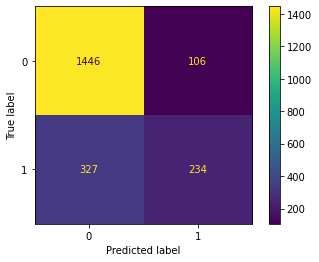

In [37]:

cm = confusion_matrix(y_test, y_pred_rfclassfier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()




### LabelEncoder ——编号处理非数值型数据

In [38]:
list(char)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in list(char):
   char[i]=le.fit_transform(char[i])

In [40]:
char

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


### 特征提取 

In [41]:
from sklearn.feature_selection import SelectKBest, chi2
selecttor = SelectKBest(chi2, k=char.shape[1])
selecttor.fit(char,y)

SelectKBest(k=15, score_func=<function chi2 at 0x000002E84E175280>)

In [42]:
scores=selecttor.pvalues_
scores

array([6.11015635e-001, 1.10476396e-019, 8.87672856e-031, 7.55142091e-001,
       1.79623344e-003, 1.72527862e-003, 5.61588231e-122, 5.70786894e-052,
       1.65153873e-043, 8.08623624e-116, 6.20355560e-003, 4.10811292e-003,
       1.22794132e-244, 8.66198711e-025, 2.04093269e-014])

In [43]:
list(char)[1]

'Partner'

In [44]:
indices=np.argsort(scores)[::-1]
print("char importans")
for i in range(0,len(scores)):
    print("%f , %s"% (scores[indices[i]] , list(char)[indices[i]]))

char importans
0.755142 , PhoneService
0.611016 , gender
0.006204 , StreamingTV
0.004108 , StreamingMovies
0.001796 , MultipleLines
0.001725 , InternetService
0.000000 , PaymentMethod
0.000000 , Partner
0.000000 , PaperlessBilling
0.000000 , Dependents
0.000000 , DeviceProtection
0.000000 , OnlineBackup
0.000000 , TechSupport
0.000000 , OnlineSecurity
0.000000 , Contract


In [45]:
columns=['PhoneService','gender','StreamingTV','StreamingMovies','MultipleLines','InternetService']
char_end=pd.DataFrame()
for i in columns:
    char_end[i]=char[i]
char_end

,PhoneService,gender,StreamingTV,StreamingMovies,MultipleLines,InternetService
0,0,0,0,0,1,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,0,1,0,0,1,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
7038,1,1,2,2,2,0
7039,1,0,2,2,2,1
7040,0,0,0,0,1,0
7041,1,1,0,0,2,1


In [46]:
x = pd.concat([num,char_end],axis=1,join='inner')
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,PhoneService,gender,StreamingTV,StreamingMovies,MultipleLines,InternetService
0,0,2.0,29.85,84.61,0,0,0,0,1,0
1,0,34.0,56.95,1889.50,1,1,0,0,0,0
2,0,2.0,53.85,108.15,1,1,0,0,0,0
3,0,45.0,42.30,1840.75,0,1,0,0,1,0
4,0,2.0,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,24.0,84.80,1990.50,1,1,2,2,2,0
7039,0,69.0,102.60,5973.69,1,0,2,2,2,1
7040,0,11.0,29.60,346.45,0,0,0,0,1,0
7041,1,4.0,74.40,306.60,1,1,0,0,2,1


# adaboost 

In [47]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=99)

In [48]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier()



### 参数寻优

In [49]:
from sklearn.model_selection import GridSearchCV
paramGrid = dict(

    algorithm=['SAMME', 'SAMME.R'],    
    n_estimators=[210,205,215]

)

gridSearchCV = GridSearchCV(
   Ada, paramGrid, 
    cv=10,  n_jobs=-1,
    return_train_score=True
)
grid = gridSearchCV.fit(x, y)

In [50]:
print('最好的得分是: %f' % grid.best_score_)
print('最好的参数是:')
for key in grid.best_params_.keys():
    print('%s=%s'%(key, grid.best_params_[key]))

最好的得分是: 0.799374
最好的参数是:
algorithm=SAMME
n_estimators=210


In [51]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=99)

In [52]:
model2 =  AdaBoostClassifier(random_state=99)
model2.fit(x2_train,y_train)

AdaBoostClassifier(random_state=99)

In [53]:
y_pred_ada= model2.predict(x2_test)

In [54]:
y_pred_ada

array([0, 0, 0, ..., 0, 0, 1])

### 模型评估

In [55]:
print('ada')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Precision",metrics.precision_score(y_test,y_pred_ada))
print("Recall",metrics.recall_score(y_test,y_pred_ada))
print("f1_score",metrics.f1_score(y_test,y_pred_ada))



ada
Accuracy: 0.7950780880265026
Precision 0.6576354679802956
Recall 0.47593582887700536
f1_score 0.5522233712512927


# XGBoost

In [56]:
from xgboost import XGBClassifier
XGBT = XGBClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV
paramGrid = dict(
    max_depth=[1, 3, 5, 7, 9],
   learning_rate=[0.01,0.05,0.1,0.2],    

    n_estimators=[ 50, 100, 150, 200],
)

gridSearchCV = GridSearchCV(
    XGBT, paramGrid, 
    cv=10,  n_jobs=10,
    return_train_score=True
)
grid = gridSearchCV.fit(x1, y)

In [58]:
print('最好的得分是: %f' % grid.best_score_)
print('最好的参数是:')
for key in grid.best_params_.keys():
    print('%s=%s'%(key, grid.best_params_[key]))
grid.best_params_  

最好的得分是: 0.807324
最好的参数是:
learning_rate=0.1
max_depth=3
n_estimators=100


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [82]:
model3 = XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)
model3.fit(x2_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [83]:
y_pred_XGBT = model3.predict(x2_test)

In [85]:
y_pred_XGBT

array([0, 0, 0, ..., 0, 0, 1])

### 模型评估

In [84]:
print('XGBT')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_XGBT))
print("Precision",metrics.precision_score(y_test,y_pred_XGBT))
print("Recall",metrics.recall_score(y_test,y_pred_XGBT))
print("f1_score",metrics.f1_score(y_test,y_pred_XGBT))

XGBT
Accuracy: 0.7941315664931378
Precision 0.647196261682243
Recall 0.49376114081996436
f1_score 0.5601617795753286


### 查看各个特征的特征重要性

In [86]:
model3.feature_importances_

array([0.07580832, 0.3303753 , 0.11915712, 0.0516095 , 0.02742778,
       0.0153585 , 0.03474991, 0.02923311, 0.05547636, 0.26080412],
      dtype=float32)

In [89]:
features = x.columns
importances = model3.feature_importances_

In [93]:
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性',ascending=False)

,特征名称,特征重要性
1,tenure,0.330375
9,InternetService,0.260804
2,MonthlyCharges,0.119157
0,SeniorCitizen,0.075808
8,MultipleLines,0.055476
3,TotalCharges,0.051610
6,StreamingTV,0.034750
7,StreamingMovies,0.029233
4,PhoneService,0.027428
5,gender,0.015358
